In [ ]:
!python -m spacy download en

In [788]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk import tokenize
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
import string
import re
import spacy
nlp = spacy.load("en_core_web_sm")

In [789]:
lang_df = pd.read_csv('./CSV_files/sent_translations.csv')
lang_df.drop('Unnamed: 0', 1, inplace=True)

## Sentence Alignment

In [790]:
# these columns were not correctly aligned
lang_df.drop([5, 96, 98, 100, 103, 106, 109, 112, 259, 260,261,262, 263, 264, 266, 272, 273, 274, 275, 276, 367, 
              375,410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421,422, 434, 435, 436, 281, 282,283, 284, 285, 286,
             287,288, 289, 290, 291, 292,293,294, 295, 296, 297,298,299,300, 301, 302, 397, 398,399,400, 
              401, 402, 403, 404, 405,406,407,408,450,451,452,453,455,456,457, 458, 459, 460, 461, 462, 505, 506,507,508,509], inplace=True)

lang_df.drop_duplicates(inplace=True)
lang_df.reset_index(inplace=True, drop=True)
lang_df.drop([433,434,435,436,437,438,439,440], inplace=True)
lang_df.reset_index(drop=True, inplace=True)

In [791]:
lang_df.drop([241, 242, 243, 244, 245, 246, 247, 248, 406, 759, 760, 954, 955, 956, 957, 958, 959, 960, 1043, 1044, 1045, 1046, 1047, 1048, 149, 1050, 1052, 1053, 1054, 1055, 1056, 1057, 1058], inplace=True)
lang_df.reset_index(inplace=True, drop=True)

In [792]:
len(lang_df)

1168

In [793]:
lang_df.head()

,Spanish,English
0,La violencia en sus diversas variantes está pr...,Violence in its several variations is present ...
1,Este fenómeno impacta a un alto por ciento de ...,This phenomenon impacts a high percentage of c...
2,La globalización y la continua búsqueda de las...,Globalization and the continued quest of natio...
3,"Asimismo, son estas nuevas tecnologías las que...",It is also these new technologies that can fos...
4,La educación está en constante transmutación c...,Education is constantly changing because of th...


## Example Sentence

In [794]:
lang_df['English'][1150]

'In the case discussed in this research, the company files several customer complaints due to faulty custom cable assemblies that are integrated into one motor.'

In [795]:
lang_df['Spanish'][1150]

'En el caso tratado en esta investigación la empresa presenta varias quejas de los clientes debido a ensambles defectuosos de cables personalizados que están integrados en un motor.'

## Explatory Data Analysis

In [796]:
from nltk.corpus import stopwords
nltk.download('stopwords')

stopword_en = stopwords.words('english')
stopword_sp = stopwords.words('spanish')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Carmen\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [797]:
def text_stats(doc,stopword):
    """
    Pass in a single document
    as a string
    """
    #sents = sent_tokenize(doc)
    #num_sents = len(sents)
    tokens = word_tokenize(doc)
    num_tokens = len(tokens)
    words = [token.lower() for token in tokens 
             if not token in string.punctuation
             if not token.lower() in stopword]
    num_words = len(words)
    vocab = len(set(words))
    characters = sum([len(word) for word in words])
    spacy_doc = nlp(doc)
    numerics = ['DATE', 'TIME', 'PERCENT', 'MONEY', 'QUANTITY','ORDINAL', 'CARDINAL']
    entities = [entity.text for entity in spacy_doc.ents 
                if not entity.label_ in numerics]
    num_entities = len(set(entities))
    #words_sent = num_words / num_sents
    char_word = characters / num_words
    lex_div = vocab / num_words
    stats = [num_tokens, num_words, vocab, num_entities, char_word, lex_div]
    return stats

In [798]:
docs_stats = []
for doc in lang_df['English']:
    docs_stats.append(text_stats(doc, stopword_en))

In [799]:
textstats_en = pd.DataFrame(docs_stats, columns=['Tokens', 'Words', 'Vocabulary', 'Entities', 'Avg Word Length', 'Lexical Diversity'])
textstats_en.head()

,Tokens,Words,Vocabulary,Entities,Avg Word Length,Lexical Diversity
0,13,6,6,0,7.333333,1.0000
1,30,16,15,0,7.500000,0.9375
2,26,15,15,0,8.666667,1.0000
3,23,11,11,0,7.909091,1.0000
4,21,10,10,0,7.900000,1.0000


In [800]:
textstats_en.describe()

,Tokens,Words,Vocabulary,Entities,Avg Word Length,Lexical Diversity
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,33.214897,17.343322,16.348459,0.686644,7.512501,0.964782
std,20.374747,10.718703,8.824927,1.236863,1.037705,0.065352
min,2.000000,1.000000,1.000000,0.000000,3.583333,0.425532
25%,21.000000,11.000000,11.000000,0.000000,6.878750,0.944444
50%,28.000000,15.000000,15.000000,0.000000,7.550505,1.000000
75%,40.000000,21.000000,20.000000,1.000000,8.160088,1.000000
max,199.000000,114.000000,80.000000,11.000000,13.000000,1.000000


In [801]:
nlp = spacy.load("es_core_news_sm")

In [802]:
docs_stats = []
for doc in lang_df['Spanish']:
    docs_stats.append(text_stats(doc, stopword_sp))

In [803]:
textstats_sp = pd.DataFrame(docs_stats, columns=['Tokens', 'Words', 'Vocabulary', 'Entities', 'Avg Word Length', 'Lexical Diversity'])
textstats_sp.head()

,Tokens,Words,Vocabulary,Entities,Avg Word Length,Lexical Diversity
0,16,6,6,0,8.166667,1.0
1,41,16,16,0,7.562500,1.0
2,30,16,16,0,9.437500,1.0
3,28,13,13,0,8.615385,1.0
4,23,11,11,0,9.272727,1.0


In [804]:
textstats_sp.describe()

,Tokens,Words,Vocabulary,Entities,Avg Word Length,Lexical Diversity
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,35.894692,17.927226,17.045377,1.046233,8.038561,0.969402
std,21.620788,10.971991,9.282143,1.815270,1.068603,0.059991
min,3.000000,1.000000,1.000000,0.000000,4.000000,0.500000
25%,23.000000,11.000000,11.000000,0.000000,7.411765,0.952381
50%,31.000000,15.000000,15.000000,0.000000,8.080128,1.000000
75%,42.000000,22.000000,21.000000,1.000000,8.714286,1.000000
max,220.000000,113.000000,88.000000,22.000000,13.000000,1.000000


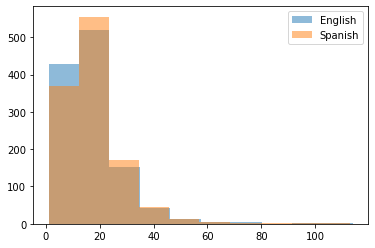

In [805]:
plt.hist(textstats_en['Words'], alpha = .5, label = "English")
plt.hist(textstats_sp['Words'], alpha = .5, label = "Spanish")
plt.legend(loc="upper right")
plt.show()

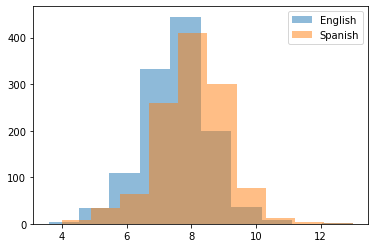

In [806]:
plt.hist(textstats_en['Avg Word Length'], alpha = .5, label = "English")
plt.hist(textstats_sp['Avg Word Length'], alpha = .5, label = "Spanish")
plt.legend(loc="upper right")
plt.show()

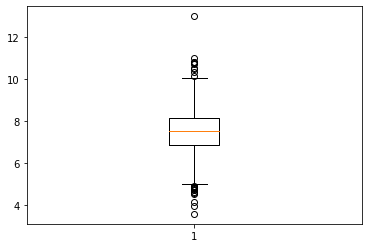

In [807]:
plt.boxplot(textstats_en['Avg Word Length'])
plt.show()

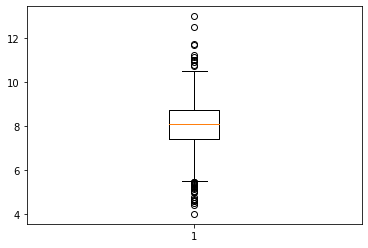

In [808]:
plt.boxplot(textstats_sp['Avg Word Length'])
plt.show()

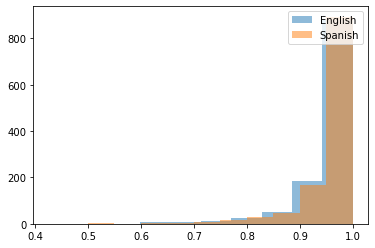

In [809]:
plt.hist(textstats_en['Lexical Diversity'], alpha = .5, label = "English")
plt.hist(textstats_sp['Lexical Diversity'], alpha = .5, label = "Spanish")
plt.legend(loc="upper right")
plt.show()

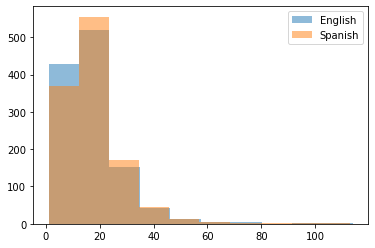

In [810]:
plt.hist(textstats_en['Words'], alpha = .5, label = "English")
plt.hist(textstats_sp['Words'], alpha = .5, label = "Spanish")
plt.legend(loc="upper right")
plt.show()

In [811]:
# English text
en_doc = nlp(" ".join(lang_df['English']))
en_without_stopwords = [token for token in en_doc if not token.is_stop]
lemmas = [token.lemma_ for token in en_without_stopwords]

# Spanish text
sp_doc = nlp(" ".join(lang_df['Spanish']))
sp_without_stopwords = [token for token in en_doc if not token.is_stop]
lemmas = [token.lemma_ for token in sp_without_stopwords]

extract_and_tokenize_terms(lang_df['English'], stopwords_en)

In [812]:
def plot_wordcloud(stopwords, lang, text, colormap='Reds', mask=None,max_words=500,max_font_size=100,figure_size=(24.0,16.0),title = None, title_size=40, image_color=False):
    stopwords = set(lang)
    more_stopwords = {'one', 'br', 'pr', 'th', 'sayi', 'fo', 'Unknown', 'las', 'la', 'va', 'ha', 'en', 
                          'un', 'han', 'c', 'estas', 'estos', 'dtype', 'se', 'por', 'para', 'de', 'este', 'está','t', 'y', 'm', 'r', 'v', 'p', 'sb', 'iii', 'i'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='black',
                    colormap = colormap,
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=800, 
                    height=400,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    plt.imshow(wordcloud);
    plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                              'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  

In [813]:
english_stopwords = stopwords.words('english')
spanish_stopwords = stopwords.words('spanish')

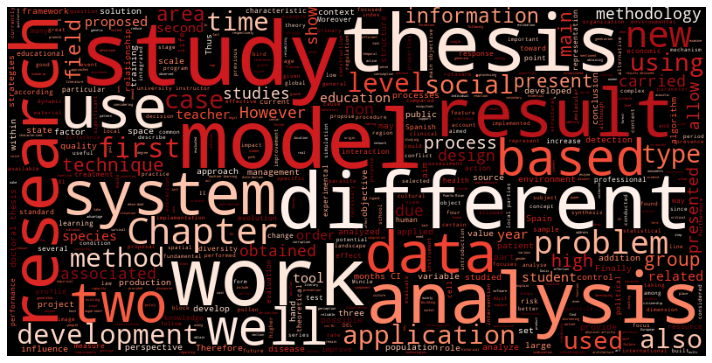

In [814]:
plot_wordcloud(stopword_en, english_stopwords, en_doc, figure_size=(10,10))

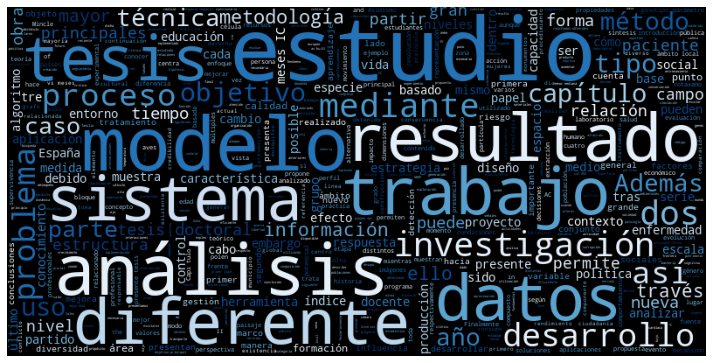

In [815]:
plot_wordcloud(stopword_sp, spanish_stopwords, sp_doc, colormap='Blues', figure_size=(10,10))

### Preprocessing Text

In [816]:
def remove_punctuation(text):
    return re.sub(r'[^\w\s]','',text)

lang_df['Spanish'] = lang_df['Spanish'].apply(remove_punctuation)
lang_df['English'] = lang_df['English'].apply(remove_punctuation)

In [817]:
sp_stemmer = SnowballStemmer("spanish")
en_stemmer = SnowballStemmer("english")

lang_df['English'] = [en_stemmer.stem(stem) for stem in lang_df['English']]

lang_df['Spanish'] = [sp_stemmer.stem(stem) for stem in lang_df['Spanish']]

In [818]:
# lowercase everything
lang_df['English'] = lang_df['English'].apply(lambda x: x.lower())
lang_df['Spanish'] = lang_df['Spanish'].apply(lambda x: x.lower())

In [819]:
# tokenize sentences
lang_df['English'] = lang_df['English'].apply(lambda x: word_tokenize(x))

lang_df['Spanish'] = lang_df['Spanish'].apply(lambda x: word_tokenize(x))

In [820]:
lang_df['English'] = lang_df['English'].apply(lambda x: [item for item in x if item not in english_stopwords])
lang_df['Spanish'] = lang_df['Spanish'].apply(lambda x: [item for item in x if item not in spanish_stopwords])

In [821]:
lang_df['Spanish'][934]

['primer',
 'capitulo',
 'presentamos',
 'arte',
 'acerca',
 'principales',
 'temas',
 'tratados',
 'tesis',
 'temas',
 'relacion']

In [822]:
lang_df['English'][934]

['chapter',
 '1',
 'deals',
 'general',
 'introduction',
 'mentioned',
 'models',
 'contribution',
 'dissertation',
 'related',
 'literatur']

In [823]:
lang_df['English'] = lang_df['English'].apply(lambda x: ' '.join(x))
lang_df['Spanish'] = lang_df['Spanish'].apply(lambda x: ' '.join(x))

In [826]:
from tensorflow.keras.preprocessing.text import one_hot

en_vocab_size = len(set(lang_df['English'].str.split().sum()))
print('Vocab size:', en_vocab_size)
lang_df['En_Encoded'] = lang_df['English'].apply(one_hot, args=[en_vocab_size])


Vocab size: 6474


"en_vocab_size = len(set(lang_df['Spanish'].str.split().sum()))\nprint('Vocab size:', en_vocab_size)\nlang_df['Encoded'] = lang_df['Spanish'].apply(one_hot, args=[en_vocab_size])\n"

In [830]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

X = pad_sequences(lang_df['Encoded'].values, padding='post')
print(X.shape)
X

(1168, 113)


array([[3116, 6396, 6030, ...,    0,    0,    0],
       [4391, 4984, 3818, ...,    0,    0,    0],
       [2692, 1607, 5540, ...,    0,    0,    0],
       ...,
       [ 679, 1387,  690, ...,    0,    0,    0],
       [3975,  690, 1353, ...,    0,    0,    0],
       [3795, 4529, 2451, ...,    0,    0,    0]])

In [835]:
lang_df.head()

,Spanish,English,Encoded
0,violencia diversas variantes presente ambitos ...,violence several variations present areas societi,"[3116, 6396, 6030, 3777, 4552, 6075]"
1,fenomeno impacta alto ciento niños mundo paise...,phenomenon impacts high percentage children wo...,"[4391, 4984, 3818, 3490, 969, 3522, 1913, 294,..."
2,globalizacion continua busqueda naciones desar...,globalization continued quest nations develop ...,"[2692, 1607, 5540, 1064, 4796, 1912, 4512, 628..."
3,asimismo nuevas tecnologias pueden llegar fome...,also new technologies foster inequalities anti...,"[4121, 2395, 4512, 99, 4692, 3167, 6072, 3087,..."
4,educacion constante transmutacion consecuencia...,education constantly changing political social...,"[4782, 3102, 2056, 3933, 4282, 166, 2858, 2239..."
